In [258]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [259]:
df = pd.read_csv('/Users/pranaymitra/Downloads/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Cleaning

In [260]:
df.shape

(13320, 9)

In [261]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [262]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [263]:
#Making certain assumptions as to what data is not needed and thus dropping certain columns.
df2 = df.drop(['area_type','society','availability'],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [264]:
df2.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [265]:
#Since we have 13k entries, we can easily drop some as the number of missing vals is pretty low
df2.dropna(inplace=True)

In [266]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [267]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [268]:
df2['size'].unique()
#We can see there are different words used for similar things i.e 3BHK/3 Bedroom, so we make them of one type

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [269]:
#We tokenize the string, and take its first token as integer value
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [270]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [271]:
df2['total_sqft'].unique()
#Here we see some sqft in range form which is an error in data and we need to correct it

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [272]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [273]:
#Displaying how the module works
a = 'abh'
is_float(a)

False

In [274]:
b = 1133
is_float(b)

True

In [275]:
c = '1133-1140'
is_float(c)

False

In [276]:
df2[df2['total_sqft'].apply(is_float)]
#We get dataframe of valid float numbers , but we need opposite of that

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [277]:
df2[~df2['total_sqft'].apply(is_float)]
#SO, we use the ~ symbol to get the non float values, like so

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [278]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [279]:
# Displaying how the module works
d = '1133-1140'
convert_sqft_to_num(d)

1136.5

In [280]:
e = '1133'
convert_sqft_to_num(e)

1133.0

In [281]:
f = '1133Meters'
convert_sqft_to_num(f)

In [282]:
df3 = df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [283]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


### Feature Engineering and Dimensionality Reduction

In [284]:
df4 = df3.copy()
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [285]:
# Since price is in lakh ruppees we multiply the price column with 100000
df4['price_per_sqft'] =df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [286]:
len(df4.location.unique())

1265

In [287]:
df4['location']= df4['location'].apply(lambda x: x.strip())

loc_stats = df4.groupby('location')['location'].agg('count')
loc_stats.sort_values(ascending = False)

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [288]:
len(loc_stats[loc_stats<=10])

1017

In [289]:
loc_less_than_10 = loc_stats[loc_stats<=10]
loc_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1017, dtype: int64

In [290]:
len(df4.location.unique())

1254

In [291]:
df4.location = df4.location.apply( lambda x: 'other' if x in loc_less_than_10 else x )

In [292]:
#Checking changes
df4[34:44]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
38,Chikkalasandra,3 BHK,1290.00,2.0,2.0,56.12,3,4350.387597
39,Uttarahalli,2 BHK,1143.00,2.0,2.0,45.00,2,3937.007874
41,Sarjapur Road,3 BHK,1254.00,3.0,2.0,38.00,3,3030.303030
42,other,1 BHK,600.00,1.0,0.0,38.00,1,6333.333333
43,Yelahanka,1 Bedroom,660.00,1.0,0.0,48.00,1,7272.727273
44,Kanakpura Road,2 BHK,1330.74,2.0,2.0,91.79,2,6897.665960
46,Doddathoguru,2 BHK,970.00,2.0,0.0,33.00,2,3402.061856
47,Whitefield,2 BHK,1459.00,2.0,1.0,94.82,2,6498.971899
48,KR Puram,2 Bedroom,800.00,1.0,1.0,130.00,2,16250.000000
49,other,2 BHK,869.00,2.0,1.0,36.00,2,4142.692750


In [293]:
#Reduced Dimensionality
len(df4.location.unique())

238

### Outlier detection and removal

In [294]:
df4[df4.total_sqft/df4.bhk<300]
#We have 655 such entries which are below threshold of 300 sqft per bhk

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [295]:
len(df4)

12710

In [296]:
#Here we remove the entries which do not cross the threshold i.e we remove outliers
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [297]:
df5.price_per_sqft.describe()
#Here we see the min and max values are very extreme, hence we try to remove extreme values

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [298]:
# We mak function to remove outliers in price_per_sqft per location and bring them in m-st < df <= m+st range.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    

In [299]:
df5.shape

(12055, 8)

In [300]:
#We see that the outliers have been removed
df6 = remove_pps_outliers(df5)
df6.shape

(9848, 8)

In [301]:
def scatter_charts(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='green',label='3 BHK',s=50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price per sqft')
    plt.title('Location wise data')
    plt.legend(loc='best')
    

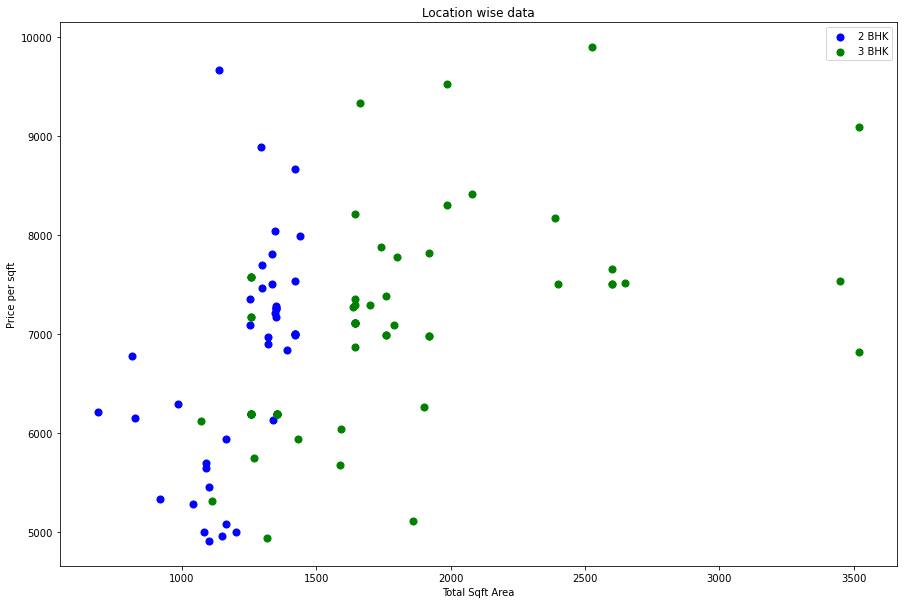

In [302]:
scatter_charts(df6,'Hebbal')
# We see the outliers whose price is too high or too low for the given area

In [303]:
#Function for removing the outliers like these
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape


(7025, 8)

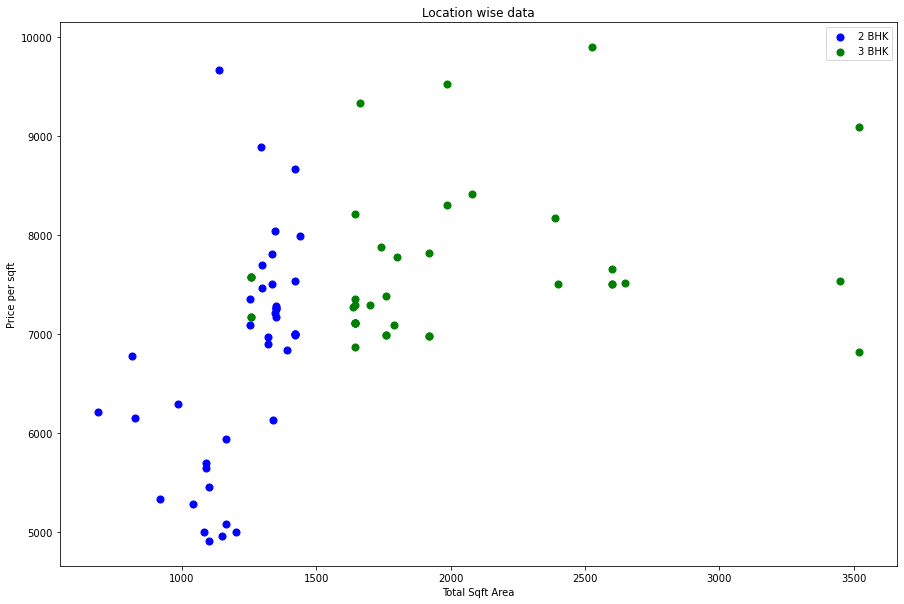

In [304]:
#Compare charts
scatter_charts(df7,'Hebbal')

Text(0, 0.5, 'Count')

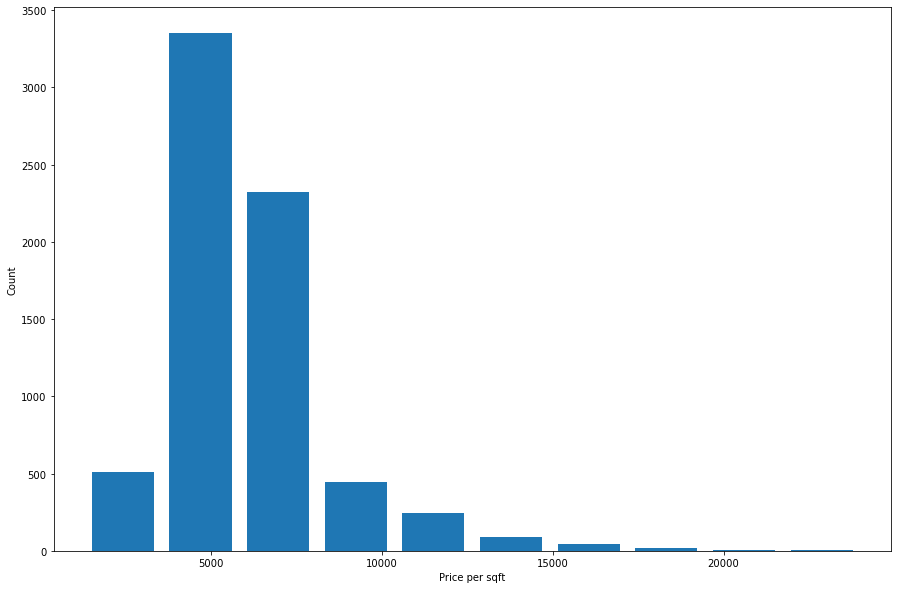

In [305]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [306]:
df7.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [307]:
df7[df7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

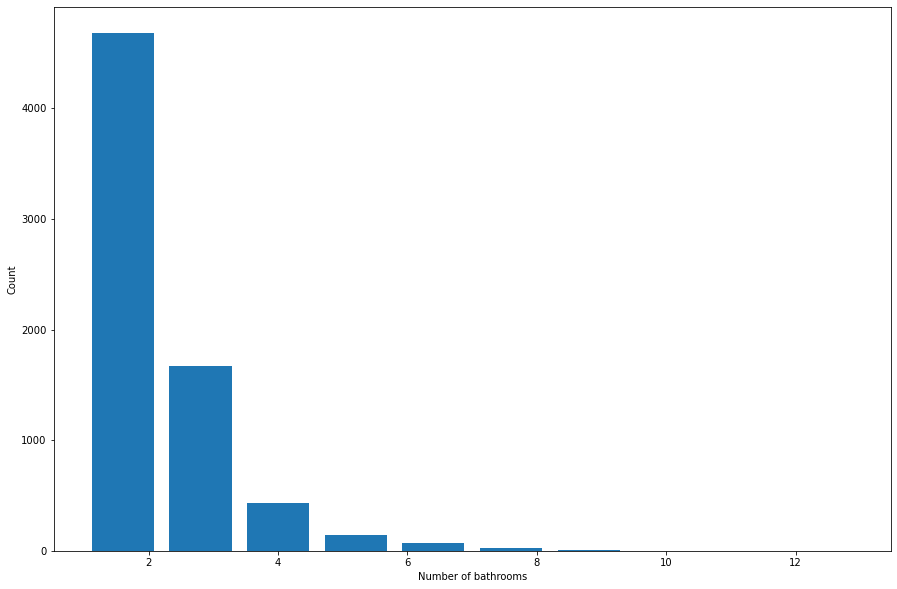

In [308]:
matplotlib.rcParams['figure.figsize']=(15,10)
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [309]:
df7[df7.bath>df7.bhk+2]
# for criteria, bathroom > bedroom +2 are outliers, we remove them

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [310]:
df8 = df7[~(df7.bath>df7.bhk+2)]
df8.shape

(7022, 8)

In [311]:
#Now unnecessary features can be dropped, like size and price_per_sqft which was just used for outlier removal
df9 = df8.drop(['size','price_per_sqft'],axis=1)
df9.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


### Model Building

In [316]:
# OneHot Encoding for location column as the values need to be numerical.
dummies = pd.get_dummies(df9.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [318]:
#Joining both data frames and dropping one col to avoid dummy var trap
df10 = pd.concat([df9,dummies.drop('other',axis=1)],axis=1)
df10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [321]:
df11 = df10.drop('location',axis=1)
df11.shape

(7022, 242)

In [325]:
x = df11.drop('price',axis=1)
y= df11.price

In [354]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state= 3)

In [355]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8753640429777358

In [359]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss =ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)
cross_val_score(lr,x,y,cv = ss)

array([0.84210285, 0.85697538, 0.84467973, 0.87125499, 0.85928535])

In [365]:
#GridSearchCV to test out various models to see which fit better / HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear_reg' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        
        'lasso': {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        
        'decision_trees' : {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)
# WE see that out of the 3 models we tried , we get best accuracy from Linear Regression with parameters normalize and False

,model,best_score,best_params
0,linear_reg,0.854860,{'normalize': False}
1,lasso,0.697703,"{'alpha': 1, 'selection': 'random'}"
2,decision_trees,0.762852,"{'criterion': 'mse', 'splitter': 'random'}"


In [372]:
#Now we write a predict_price function 
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]  #This line gives index of columns

    X = np.zeros(len(x.columns)) # Allots zeros
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return lr.predict([X])[0]

In [373]:
predict_price('Rajaji Nagar',1600,3,4) #Price in lakh ruppees

274.8605774022278

In [374]:
predict_price('Indira Nagar',1000, 3, 3)

162.06494335102644

In [375]:
predict_price('Indira Nagar',1600, 3, 4)

213.66708996693887

In [376]:
predict_price('Hebbal',1000, 3, 3)

75.5202959859806

### Export to pickle file

In [378]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f) # Only story coeff, score, x,y etc not whole data

### Export location and column information to a file that will be useful later on in our prediction application


In [380]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))